In [1]:
import pandas as pd
df = pd.read_csv("/content/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


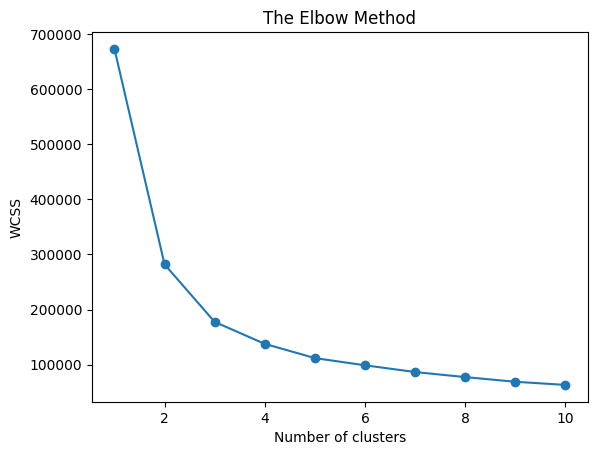

In [23]:

from sklearn.cluster import KMeans
X = df.loc[:, ["math score", "reading score", "writing score"]]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.plot(range(1, 11), wcss, markersize=6, marker='o')
plt.show()

In [20]:
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

In [32]:
import plotly.graph_objects as go

Scene = dict(xaxis=dict(title='Math Score'), yaxis=dict(title='Reading Score'), zaxis=dict(title='Writing Score'))
labels = model.labels_
trace = go.Scatter3d(x=X['math score'], y=X['reading score'], z=X['writing score'], mode='markers',
                     marker=dict(color=labels, size=7, line=dict(color='black', width=10)))
layout = go.Layout(margin=dict(l=0, r=0), scene=Scene, height=800, width=800)
data = [trace]
fig = go.Figure(data=data, layout=layout)
fig.update_layout(title_text="Predicted Clusters")
fig.show()